Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

Load and Check Data

In [2]:
path = '../input/breast-cancer-wisconsin-data/data.csv'
data = pd.read_csv(path)

In [3]:
df = data.copy()

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset):
    for i in dataset.columns:
        null_feat = pd.DataFrame(len(dataset[i]) - dataset.isnull().sum(), columns = ['Count'])
        percentage_null = pd.DataFrame((len(dataset[i]) - (len(dataset[i]) - dataset.isnull().sum()))/len(dataset[i])*100, columns = ['Count'])
        percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#D84E5F',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values Analysis with BarPlot")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(60, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(" Types of Features ".center(60, '*'))
    print(df.dtypes,"\n")
    print(' Duplicate Values Analysis '.center(60, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print("".center(60, '*'))


check_df(df)
missing_plot(df)

************************** SHAPE ***************************
Observations -------> 569
Features     -------> 33
******************** Types of Features *********************
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst         

In [6]:
# Since they do not carry any pattern, we exclude them from the data set.
df.drop(['id', 'Unnamed: 32'], axis= 1, inplace= True)

Principal Component Analysis 

In [7]:
df_ = df.drop(['diagnosis'], axis= 1)

In [8]:
df_ = StandardScaler().fit_transform(df_)

In [9]:
pca = PCA()
pca_fit = pca.fit_transform(df_)

In [10]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

 The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])


 pca.explained_variance_ratio_.cumsum()  This returns a vector x in the same way that x[i] returns the cumulative variance explained by the initial dimensions i+1


 Optimum Number of Components 

In [12]:
pca = PCA().fit(df_)

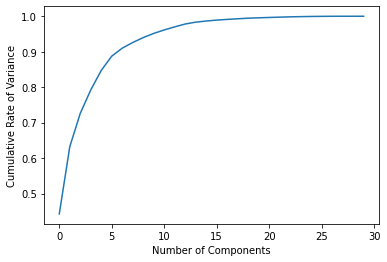

In [13]:
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Rate of Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.show()

In [14]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4) * 100)
print(var1)

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15 96.13 97.
 97.8  98.32 98.63 98.9  99.1  99.28 99.44 99.54 99.64 99.73 99.81 99.87
 99.92 99.95 99.97 99.98 99.98 99.98]


Text(0, 0.5, 'Cumulative Proportion variance explained')

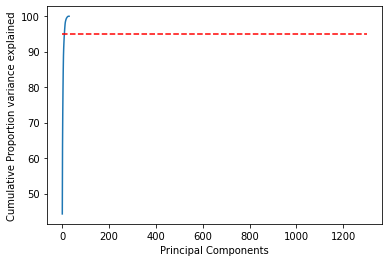

In [15]:
plt.plot(var1)
plt.hlines(95,0,1300,colors='red',linestyles='dashed')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Proportion variance explained")

In [16]:
# to find principal component which is taken greather than 95 %
Num_components = var1<95
print("Optimum Number of Components",Num_components.sum())

Optimum Number of Components 9


 Creating the Final PCA 

In [17]:
df = data.copy()

In [18]:
y = df['diagnosis'] # Dependent variable 
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1) # Independent Variable 


def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

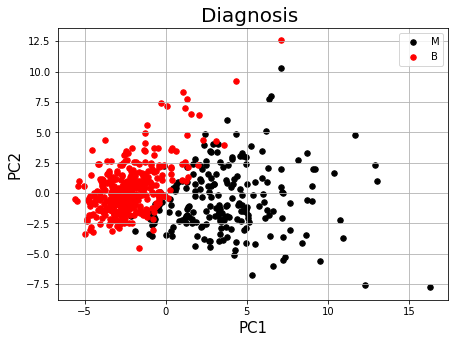

In [19]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(["black", "red","yellow","green"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=30)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")